In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv
/kaggle/input/students-grading-dataset/metadata.xlsx
/kaggle/input/students-grading-dataset/Students_Grading_Dataset.json


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [3]:
print(df.isnull().sum())

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64


In [8]:
df[df.isnull().any(axis=1)]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
5,S1005,Liam,Brown,student5@university.com,Male,21,Engineering,NaN,78.85,43.53,...,67.29,62.08,B,8.5,Yes,Yes,PhD,High,1,5.0
6,S1006,Ahmed,Jones,student6@university.com,Male,24,Business,57.60,66.26,89.07,...,93.65,83.21,F,21.3,No,Yes,NaN,Low,5,6.4
7,S1007,Ahmed,Smith,student7@university.com,Male,19,Engineering,51.91,45.67,73.96,...,93.24,81.93,F,27.3,Yes,No,NaN,Medium,4,4.3
9,S1009,Sara,Smith,student9@university.com,Female,22,Engineering,64.01,87.96,98.47,...,78.60,84.99,A,9.6,No,Yes,NaN,Medium,10,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,S5992,Sara,Johnson,student4992@university.com,Male,18,CS,NaN,61.44,64.59,...,80.08,62.51,A,23.3,Yes,No,High School,Medium,1,6.2
4993,S5993,Ali,Johnson,student4993@university.com,Female,22,Business,99.21,60.16,59.18,...,69.56,85.86,A,16.9,No,Yes,NaN,Low,2,7.8
4994,S5994,John,Johnson,student4994@university.com,Female,19,Mathematics,NaN,69.92,55.48,...,64.36,55.88,F,25.5,No,Yes,High School,Low,2,4.1
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3


In [4]:
df["Attendance (%)"].fillna(df["Attendance (%)"].mean(), inplace=True)
df["Assignments_Avg"].fillna(df["Assignments_Avg"].mean(), inplace=True)
df["Parent_Education_Level"].fillna(df["Parent_Education_Level"].mean(), inplace=True)

<ipython-input-4-faca825ad228>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Attendance (%)"].fillna(df["Attendance (%)"].mean(), inplace=True)
<ipython-input-4-faca825ad228>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

TypeError: can only concatenate str (not "int") to str

In [5]:
import seaborn as sns
sns.boxplot(x=df['Parent_Education_Level'])
plt.title('Parent_Education_Level')
plt.plot()

TypeError: Horizontal orientation requires numeric `x` variable.

In [6]:
print("Number of duplicated rows: ", df.duplicated().sum())
df.head()

Number of duplicated rows:  0


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [7]:
Q1 = df["Stress_Level (1-10)"].quantile(0.25)  # First quartile (25%)
Q3 = df["Stress_Level (1-10)"].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile range

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Stress_Level (1-10)"] < lower_bound) | (df["Stress_Level (1-10)"] > upper_bound)]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 0


In [10]:
print(df["Department"].unique())

['Engineering' 'Business' 'Mathematics' 'CS']


In [33]:
print(df.dtypes)

Student_ID                     object
First_Name                     object
Last_Name                      object
Email                          object
Gender                         object
Age                             int64
Department                     object
Attendance (%)                float64
Midterm_Score                 float64
Final_Score                   float64
Assignments_Avg               float64
Quizzes_Avg                   float64
Participation_Score           float64
Projects_Score                float64
Total_Score                   float64
Grade                          object
Study_Hours_per_Week          float64
Extracurricular_Activities     object
Internet_Access_at_Home        object
Parent_Education_Level         object
Family_Income_Level            object
Stress_Level (1-10)             int64
Sleep_Hours_per_Night         float64
dtype: object


In [11]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,13.610481,17.213209,17.238744,13.646226,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,64.737500,55.457500,54.667500,63.687500,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.431409,70.510000,69.735000,74.798673,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,86.182500,84.970000,84.500000,85.570000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [8]:
df.shape

(5000, 23)

In [12]:
df["Gender"].value_counts()


Gender
Male      2551
Female    2449
Name: count, dtype: int64

In [13]:
df["Family_Income_Level"].value_counts()

Family_Income_Level
Low       1983
Medium    1973
High      1044
Name: count, dtype: int64

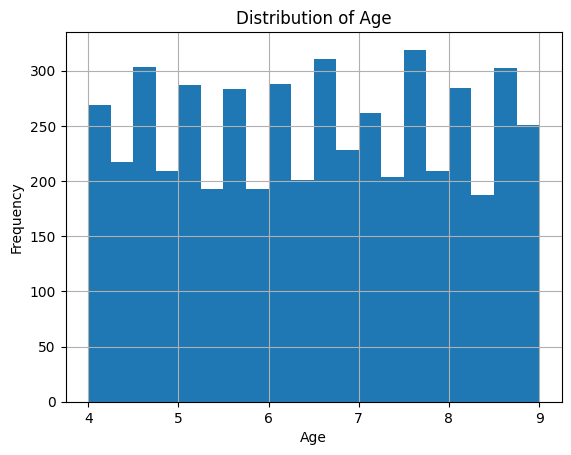

In [18]:
# DATA VISUALISATION

df["Sleep_Hours_per_Night"].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

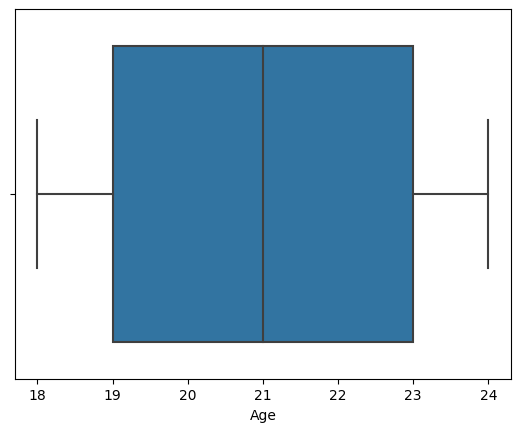

In [20]:
import seaborn as sns
sns.boxplot(x = df["Age"])
plt.show()

[]

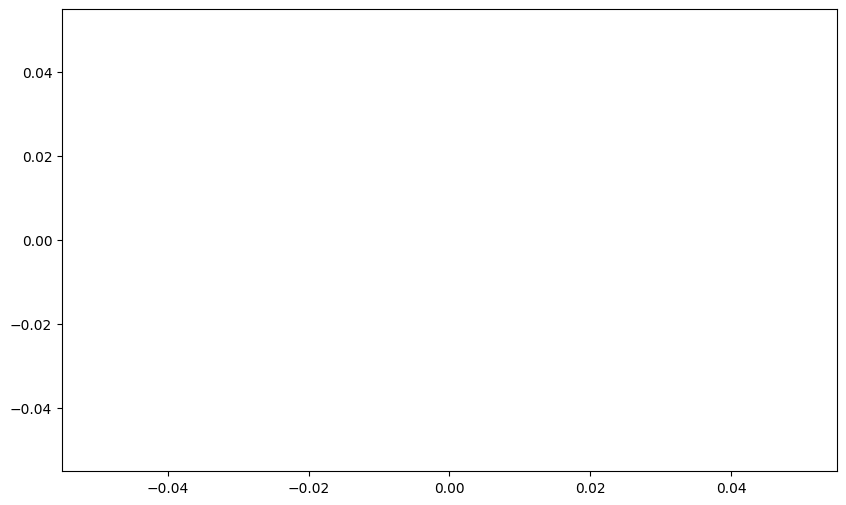

In [7]:
# EDA (EXPLORATORY DATA ANALYSIS)

# to check the correlations between the columns of the data(basically to see which data is highly related to each other)

plt.figure(figsize = (10,6))
plt.plot()

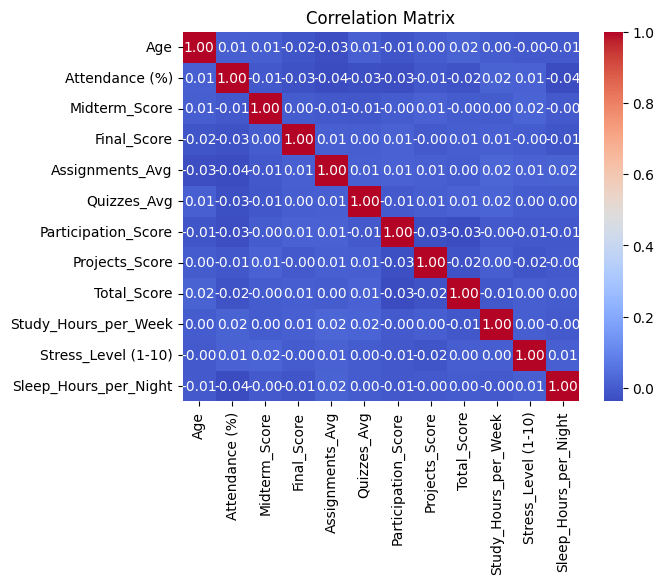

In [11]:
import seaborn as sns
sns.heatmap(df.select_dtypes(include =['number']).corr(), annot = True,  cmap= 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

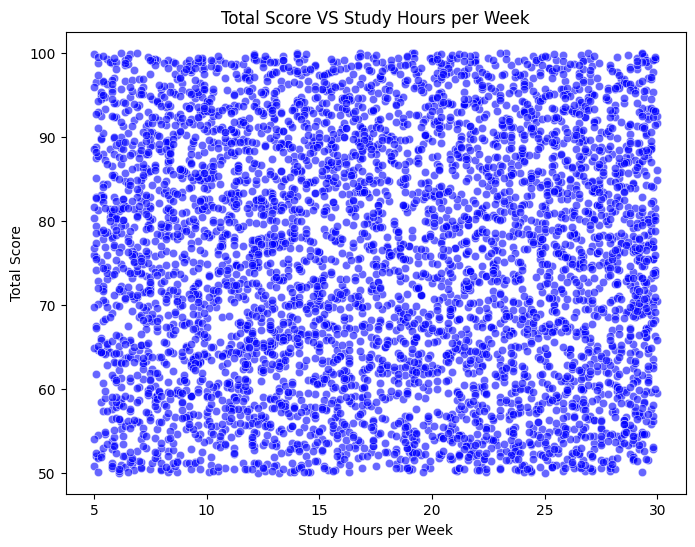

In [13]:
# PLOT A SCATTER PLOT BETWEEN TWO VALUES TO KNOW RELATION BETWEEN THEM

plt.figure(figsize = (8,6))
sns.scatterplot(x = df['Study_Hours_per_Week'], y = df['Total_Score'], alpha = 0.6, color = 'blue')
plt.title('Total Score VS Study Hours per Week')
plt.xlabel('Study Hours per Week')
plt.ylabel('Total Score')
plt.show()


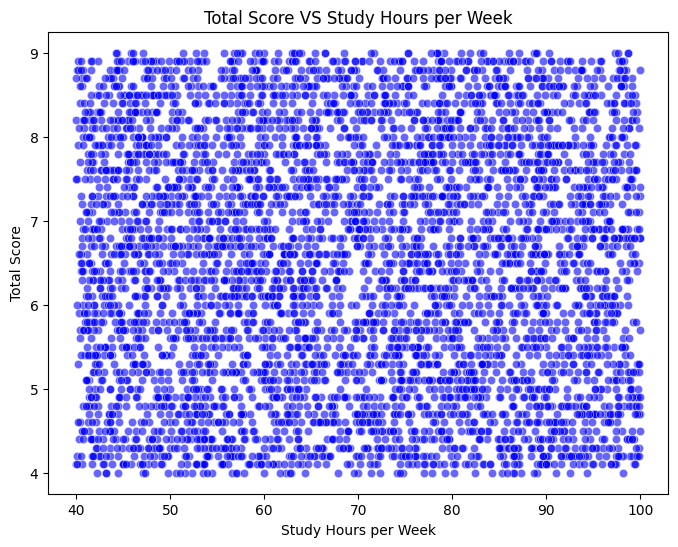

In [15]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['Final_Score'], y = df['Sleep_Hours_per_Night'], alpha = 0.6, color = 'blue')
plt.title('Total Score VS Study Hours per Week')
plt.xlabel('Study Hours per Week')
plt.ylabel('Total Score')
plt.show()


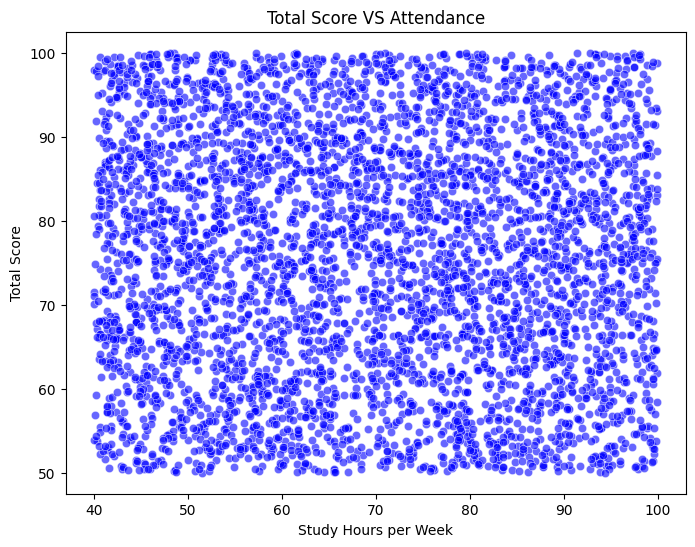

In [17]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['Final_Score'], y = df['Attendance (%)'], alpha = 0.6, color = 'blue')
plt.title('Total Score VS Attendance')
plt.xlabel('Study Hours per Week')
plt.ylabel('Total Score')
plt.show()

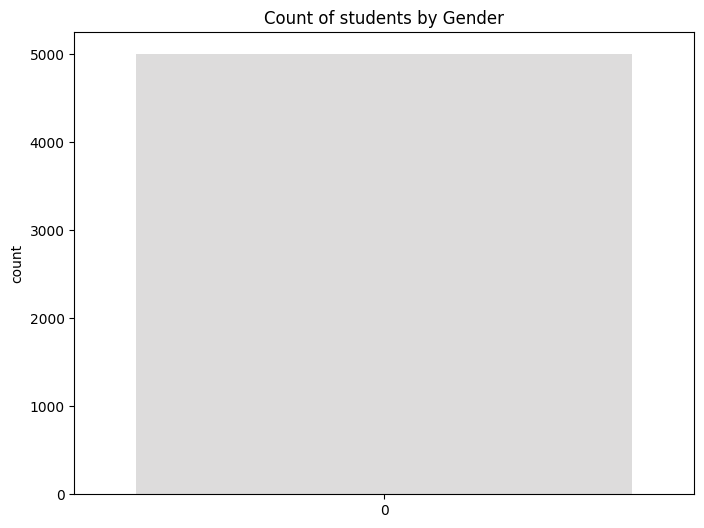

In [18]:
# to check the categorical data
plt.figure(figsize = (8,6))
sns.countplot(df['Age'], palette = 'coolwarm')
plt.title('Count of students by Gender')
plt.show()

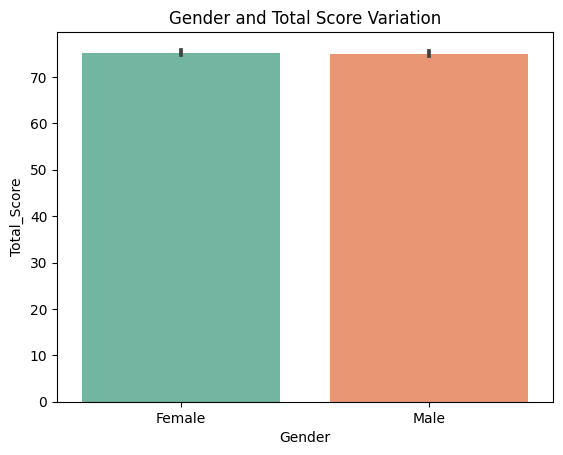

In [26]:
# To check whether the gender and totalscore are related to each other

sns.barplot(x=df['Gender'], y=df['Total_Score'], palette='Set2')
plt.title("Gender and Total Score Variation")
plt.show()

In [25]:
print(df["Total_Score"].dtype)

float64


In [27]:
# GROUPING DATA FOR DEEPER INSIGHTS

df.groupby("Gender")["Total_Score"].mean()

Gender
Female    75.265762
Male      74.983603
Name: Total_Score, dtype: float64

<ipython-input-28-ba6f69137e68>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Total_Score"], shade=True, color="blue")
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


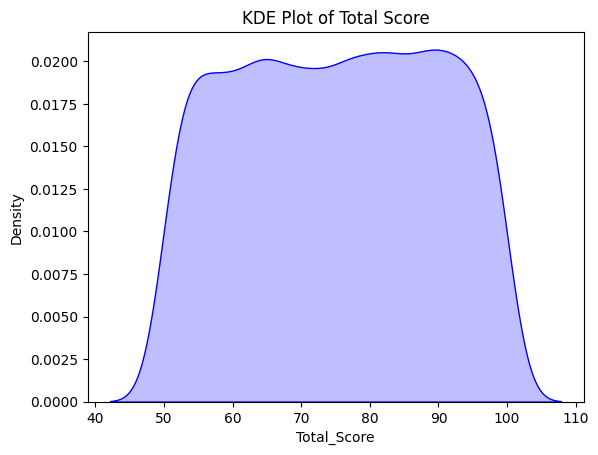

In [28]:
sns.kdeplot(df["Total_Score"], shade=True, color="blue")
plt.title("KDE Plot of Total Score")
plt.show()

In [ ]:
# STASTICAL ANALYSIS AND HYPOTHESIS CHECKING

